In [22]:
# data wrangling
import re # regular expressions!

# math and data utilities
import numpy as np
import pandas as pd

# data and statistics libraries
import sklearn.preprocessing as pre
from sklearn import model_selection
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Set-up default visualization parameters
mpl.rcParams['figure.figsize'] = [12,8]
viz_dict = {
    'axes.titlesize':18,
    'axes.labelsize':16,
}
sns.set_context("notebook", rc=viz_dict)
sns.set_style("whitegrid")

# Initial Setup
We can download the data from Kaggle to our data folder using the command line:

`kaggle competitions download -c titanic`

`unzip titanic.zip`

After that, let's get the data into some Pandas dataframes:

In [23]:
train_df = pd.read_csv('data/train.csv', index_col='PassengerId')
test_df = pd.read_csv('data/test.csv', index_col='PassengerId')

## An outline of our process:

1. Exploratory Analysis: What variables are we working with. Which ones are categorical? Which ones are continuous? Are there missing values? Can we find any statistical relationships between our variables?

# Exploratory Data Analysis:

In [24]:
# Look at the first few entries
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's take a look at the number of entries in our training data, as well as those variables contain significant missing data. Below, we see that the training data contains 891 passenger samples, with 11 total variables describing each passenger. We see that there is a significant amount of missing data for the variables __age__ and __cabin__. We will have to deal with this missing data by either finding an intelligent way to fill the gaps, or perhaps dropping the features entirely. 

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Our next step (and the primary goal of our exploration) will be to ask and answer the following questions:

1. _What additional information can we garner from what we already have?
2. _What relationships can we find between our data, especially between the input and output variables?_ 

To answer the first question, lets consider the __name__ variable. 

In [26]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

You might notice that in every case, a name is accompanied by a title like 'Mr', 'Mrs', 'Dr' or 'Rev'. These titles give us valuable insights into the passengers lives such as social status and occupation. Let's extract this data and add it as a feature:

In [31]:
# Parse titles from 'Name' column and display their values:
train_df['Title'] = train_df['Name'].str.extract(r'([A-Za-z]+)\.')
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Jonkheer      1
Capt          1
Ms            1
Sir           1
Countess      1
Mme           1
Lady          1
Name: Title, dtype: int64

Next, we might notice that many of these titles are synonymous. For example, _Mme_ is the French equivalent to  'Mrs' and _Mlle_ is the equivalent to  'Miss'. Other titles imply varying levels of nobility like 'Sir', 'Countess' and 'Don'. We can reduce our titles down to their unique equivalents by using a dictionary:

In [32]:
title_dict = {
    'Mrs': 'Mrs', 'Lady': 'Lady', 'Countess': 'Lady',
    'Jonkheer': 'Lord', 'Col': 'Officer', 'Rev': 'Rev',
    'Miss': 'Miss', 'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss', 'Dona': 'Lady',
    'Mr': 'Mr', 'Dr': 'Dr', 'Major': 'Officer', 'Capt': 'Officer', 'Sir': 'Lord', 'Don': 'Lord', 'Master': 'Master'
}

train_df.Title =train_df.Title.map(title_dict)

I chose to lump all professional military titles into the category 'Officer'. This choice of title was arbitrary but is meant to illustrate those instances where a passenger's title was related to his/her work. 

Text(0.5, 1.0, 'Histogram of Categorical Data: Title')

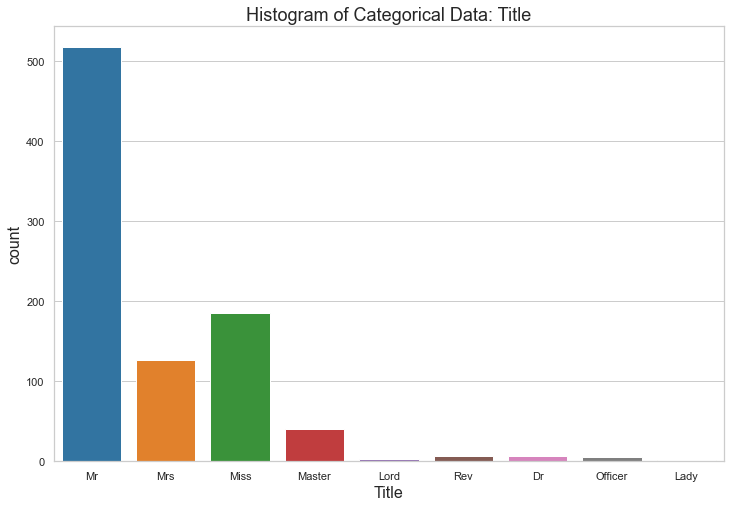

In [30]:
sns.countplot(train_df.Title).set_title("Histogram of Categorical Data: Title")

In [ ]:
It appears based on our title data that the majority of our passengers were male. 